# Quickstart

This notebook describes a minimal example. First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [1]:
%matplotlib inline
import numpy as np
import daskperiment

First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [2]:
ex = daskperiment.Experiment(id='quickstart_pj')
ex

2019-02-09 23:13:20,666 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/quickstart_pj
2019-02-09 23:13:20,672 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-02-09 23:13:20,674 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/quickstart_pj') from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-02-09 23:13:20,676 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: quickstart_pj, trial_id: 7, backend: LocalBackend('daskperiment_cache/quickstart_pj'))
2019-02-09 23:13:21,036 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-09 23:13:21,037 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-02-09 23:13:21,038 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.1.dev0
2019-02-09 23:13:21,039 [dask

Experiment(id: quickstart_pj, trial_id: 7, backend: LocalBackend('daskperiment_cache/quickstart_pj'))

Then, use `Experiment.parameter` method to define parameters (input variables for the experiment). The actual value of each parameter can be changed in every trial.

In [3]:
a = ex.parameter('a')
b = ex.parameter('b')
a

Parameter(a: Undefined)

Next, you can define each experiment step (function) by decorating with `Experiment` instance (`@ex`).

Note that the function to output the final result (mostly objective value to be minimized or maximized) must be decorated with `Experiment.result`. The chain of these functions are expressed as `Dask.Delayed` instance.

In [4]:
@ex
def prepare_data(a, b):
    return a + b 

@ex.result
def calculate_score(s):
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)
s

Delayed('calculate_score-248b2d7d-ae20-4b55-ab1d-8641a1ba7a74')

Thus, you can visualize computation graph via `.visualize` method.

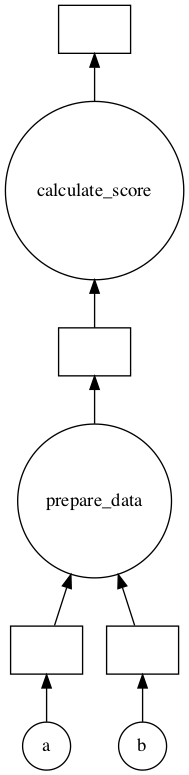

In [5]:
s.visualize()

Use `Experiment.set_parameters` method to set parameters for a trial. After setting parameters, `Parameter` variable and experiment result will be computable.

Parameters are recommended to be a scalar (or lightweight value) because these are stored as history (for example, passing filename as a parameter is　preffered rather than passing `DataFrame`).

In [6]:
ex.set_parameters(a=1, b=2)
a.compute()

2019-02-09 23:13:21,692 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>


1

In [7]:
s.compute()

2019-02-09 23:13:21,712 [daskperiment.core.trial] [INFO] Started Experiment (trial id=8)
2019-02-09 23:13:21,715 [daskperiment.core.experiment] [INFO] Target: calculate_score-248b2d7d-ae20-4b55-ab1d-8641a1ba7a74
2019-02-09 23:13:21,720 [daskperiment.core.experiment] [INFO] Random seed is not provided. Initializing with generated seed: 4119651207
2019-02-09 23:13:21,723 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-09 23:13:21,726 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_8.py
2019-02-09 23:13:21,728 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_8.txt
2019-02-09 23:13:21,731 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_8.txt
2019-02-09 23:13:21,736 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=8)
2019

3.3333333333333335

You can update any parameters for next trial. Every trials can be distinguished by trial id.

In [8]:
ex.set_parameters(b=3)
s.compute()

2019-02-09 23:13:21,778 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=3<class 'int'>
2019-02-09 23:13:21,799 [daskperiment.core.trial] [INFO] Started Experiment (trial id=9)
2019-02-09 23:13:21,806 [daskperiment.core.experiment] [INFO] Target: calculate_score-248b2d7d-ae20-4b55-ab1d-8641a1ba7a74
2019-02-09 23:13:21,810 [daskperiment.core.experiment] [INFO] Random seed is not provided. Initializing with generated seed: 2786204846
2019-02-09 23:13:21,811 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=3<class 'int'>
2019-02-09 23:13:21,812 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_9.py
2019-02-09 23:13:21,817 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_9.txt
2019-02-09 23:13:21,818 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirement

2.5

In [9]:
ex.get_history()

,a,b,Seed,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,,
1,1,2,3621047138,3.333333,<class 'float'>,True,2019-02-09 23:12:17.823271,00:00:00.020709,NaN
2,1,3,3028304101,2.500000,<class 'float'>,True,2019-02-09 23:12:17.862060,00:00:00.019239,NaN
3,1,-1,3427595011,NaN,None,False,2019-02-09 23:12:18.120727,00:00:00.036386,ZeroDivisionError(division by zero)
4,1,2,3074590505,3.333333,<class 'float'>,True,2019-02-09 23:12:18.274840,00:00:00.019795,NaN
5,3,2,188388652,2.000000,<class 'float'>,True,2019-02-09 23:12:18.316023,00:00:00.020726,NaN
6,1,2,2062562240,3.333333,<class 'float'>,True,2019-02-09 23:12:18.440663,00:00:00.024480,NaN
7,3,4,2263352391,1.428571,<class 'float'>,True,2019-02-09 23:12:18.957242,00:00:00.024543,NaN
8,1,2,4119651207,3.333333,<class 'float'>,True,2019-02-09 23:13:21.735993,00:00:00.023776,NaN
9,1,3,2786204846,2.500000,<class 'float'>,True,2019-02-09 23:13:21.822778,00:00:00.023758,NaN


After some trials, you can retrieve parameter values specifying trial id.

In [10]:
ex.get_parameters(trial_id=1)

{'a': 1, 'b': 2}

In [11]:
ex.get_parameters(trial_id=2)

{'a': 1, 'b': 3}

`Experiment.get_history` will return a `DataFrame` which stores a history of trial parameters and its results. You can select desirable trial using `pandas` basic operation.

In [12]:
ex.get_history()

,a,b,Seed,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,,
1,1,2,3621047138,3.333333,<class 'float'>,True,2019-02-09 23:12:17.823271,00:00:00.020709,NaN
2,1,3,3028304101,2.500000,<class 'float'>,True,2019-02-09 23:12:17.862060,00:00:00.019239,NaN
3,1,-1,3427595011,NaN,None,False,2019-02-09 23:12:18.120727,00:00:00.036386,ZeroDivisionError(division by zero)
4,1,2,3074590505,3.333333,<class 'float'>,True,2019-02-09 23:12:18.274840,00:00:00.019795,NaN
5,3,2,188388652,2.000000,<class 'float'>,True,2019-02-09 23:12:18.316023,00:00:00.020726,NaN
6,1,2,2062562240,3.333333,<class 'float'>,True,2019-02-09 23:12:18.440663,00:00:00.024480,NaN
7,3,4,2263352391,1.428571,<class 'float'>,True,2019-02-09 23:12:18.957242,00:00:00.024543,NaN
8,1,2,4119651207,3.333333,<class 'float'>,True,2019-02-09 23:13:21.735993,00:00:00.023776,NaN
9,1,3,2786204846,2.500000,<class 'float'>,True,2019-02-09 23:13:21.822778,00:00:00.023758,NaN


When any error occurs during the trial, `Experiment` instance stores the log as failed trial. The "Description" column contains the error detail.

In [13]:
ex.set_parameters(a=1, b=-1)
try:
    s.compute()
    
except ZeroDivisionError as e:
    # To hide stack trace
    print('{}({})'.format(e.__class__.__name__, e))

2019-02-09 23:13:22,007 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-02-09 23:13:22,010 [daskperiment.core.trial] [INFO] Started Experiment (trial id=10)
2019-02-09 23:13:22,015 [daskperiment.core.experiment] [INFO] Target: calculate_score-248b2d7d-ae20-4b55-ab1d-8641a1ba7a74
2019-02-09 23:13:22,018 [daskperiment.core.experiment] [INFO] Random seed is not provided. Initializing with generated seed: 3106430529
2019-02-09 23:13:22,022 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-02-09 23:13:22,024 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_10.py
2019-02-09 23:13:22,029 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_10.txt
2019-02-09 23:13:22,034 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requir

ZeroDivisionError(division by zero)


In [14]:
ex.get_history()

,a,b,Seed,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,,
1,1,2,3621047138,3.333333,<class 'float'>,True,2019-02-09 23:12:17.823271,00:00:00.020709,NaN
2,1,3,3028304101,2.500000,<class 'float'>,True,2019-02-09 23:12:17.862060,00:00:00.019239,NaN
3,1,-1,3427595011,NaN,None,False,2019-02-09 23:12:18.120727,00:00:00.036386,ZeroDivisionError(division by zero)
4,1,2,3074590505,3.333333,<class 'float'>,True,2019-02-09 23:12:18.274840,00:00:00.019795,NaN
5,3,2,188388652,2.000000,<class 'float'>,True,2019-02-09 23:12:18.316023,00:00:00.020726,NaN
6,1,2,2062562240,3.333333,<class 'float'>,True,2019-02-09 23:12:18.440663,00:00:00.024480,NaN
7,3,4,2263352391,1.428571,<class 'float'>,True,2019-02-09 23:12:18.957242,00:00:00.024543,NaN
8,1,2,4119651207,3.333333,<class 'float'>,True,2019-02-09 23:13:21.735993,00:00:00.023776,NaN
9,1,3,2786204846,2.500000,<class 'float'>,True,2019-02-09 23:13:21.822778,00:00:00.023758,NaN


Every time the computation performed, `Experiment` instance is automatically saved to specified cache directory. When `Experiment` instance is initialized, it automatically load previous trials (check trial id in the log).

# Handling intermediate result

Next example shows how to retrieve an intermediate result of the chain.

The only difference is using `Experiment.persist` decorator. It makes `Experiment` instance to keep the decorated function's intermediate result. After definition, rebuilt the same workflow using the persisted function. 

Note that an intermediate result is saved as a pickle file named with its function name, function name must be unique in the experiment.

In [15]:
@ex.persist
def prepare_data(a, b):
    return a + b

d = prepare_data(a, b)
s = calculate_score(d)

2019-02-09 23:13:22,171 [daskperiment.core.code] [WARNING] Code context has been changed: prepare_data
2019-02-09 23:13:22,172 [daskperiment.core.code] [WARNING] @@ -1,3 +1,3 @@

2019-02-09 23:13:22,173 [daskperiment.core.code] [WARNING] -@ex
2019-02-09 23:13:22,175 [daskperiment.core.code] [WARNING] +@ex.persist
2019-02-09 23:13:22,176 [daskperiment.core.code] [WARNING]  def prepare_data(a, b):
2019-02-09 23:13:22,177 [daskperiment.core.code] [WARNING] -    return a + b 
2019-02-09 23:13:22,178 [daskperiment.core.code] [WARNING] +    return a + b


NOTE: Also, you can notice that `daskperiment` outputs some "WARNING" indicating code contexts has been changed. It's because `daskperiment` automatically tracks code context to guarantee reproducibility.

Let's perform some trials.

In [16]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-02-09 23:13:22,185 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-09 23:13:22,187 [daskperiment.core.trial] [INFO] Started Experiment (trial id=11)
2019-02-09 23:13:22,189 [daskperiment.core.experiment] [INFO] Target: calculate_score-9d4da45f-d7a4-4945-a6ba-1f08445efbed
2019-02-09 23:13:22,190 [daskperiment.core.experiment] [INFO] Random seed is not provided. Initializing with generated seed: 4165599119
2019-02-09 23:13:22,190 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-09 23:13:22,191 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_11.py
2019-02-09 23:13:22,193 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_11.txt
2019-02-09 23:13:22,196 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirem

3.3333333333333335

In [17]:
ex.set_parameters(a=3, b=2)
s.compute()

2019-02-09 23:13:22,226 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=2<class 'int'>
2019-02-09 23:13:22,232 [daskperiment.core.trial] [INFO] Started Experiment (trial id=12)
2019-02-09 23:13:22,236 [daskperiment.core.experiment] [INFO] Target: calculate_score-9d4da45f-d7a4-4945-a6ba-1f08445efbed
2019-02-09 23:13:22,238 [daskperiment.core.experiment] [INFO] Random seed is not provided. Initializing with generated seed: 523177816
2019-02-09 23:13:22,238 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=2<class 'int'>
2019-02-09 23:13:22,240 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_12.py
2019-02-09 23:13:22,245 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_12.txt
2019-02-09 23:13:22,248 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requireme

2.0

You can retrieve intermediate results via `Experiment.get_persisted` method by specifying function name and trial id.

In [18]:
ex.get_persisted('prepare_data', trial_id=4)

2019-02-09 23:13:22,292 [daskperiment.io.pickle] [INFO] Loaded 3 from path=daskperiment_cache/quickstart_pj/persist/quickstart_pj_prepare_data_4.pkl


3

In [19]:
ex.get_persisted('prepare_data', trial_id=5)

2019-02-09 23:13:22,318 [daskperiment.io.pickle] [INFO] Loaded 5 from path=daskperiment_cache/quickstart_pj/persist/quickstart_pj_prepare_data_5.pkl


5

# Monitoring metrics

You may need to monitor transition of some metrics during each trial. In each experiment function, you can call `Experiment.save_metric` to save metric with its key (name) and epoch.

In [20]:
@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)

2019-02-09 23:13:22,331 [daskperiment.core.code] [WARNING] Code context has been changed: calculate_score
2019-02-09 23:13:22,334 [daskperiment.core.code] [WARNING] @@ -1,3 +1,6 @@

2019-02-09 23:13:22,335 [daskperiment.core.code] [WARNING]  @ex.result
2019-02-09 23:13:22,336 [daskperiment.core.code] [WARNING]  def calculate_score(s):
2019-02-09 23:13:22,339 [daskperiment.core.code] [WARNING] +    for i in range(100):
2019-02-09 23:13:22,348 [daskperiment.core.code] [WARNING] +        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
2019-02-09 23:13:22,351 [daskperiment.core.code] [WARNING] +        
2019-02-09 23:13:22,355 [daskperiment.core.code] [WARNING]      return 10 / s


In [21]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-02-09 23:13:22,371 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-09 23:13:22,376 [daskperiment.core.trial] [INFO] Started Experiment (trial id=13)
2019-02-09 23:13:22,380 [daskperiment.core.experiment] [INFO] Target: calculate_score-f407db73-6a67-4d0b-9fb7-024577dea63f
2019-02-09 23:13:22,382 [daskperiment.core.experiment] [INFO] Random seed is not provided. Initializing with generated seed: 2994940965
2019-02-09 23:13:22,384 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-09 23:13:22,385 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_13.py
2019-02-09 23:13:22,387 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_13.txt
2019-02-09 23:13:22,389 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirem

3.3333333333333335

After a trial, you can load saved metric using `Experiment.load_metric` specifying its name and trial_id. As it is returned as `DataFrame`, you can easily investigate it.

In [22]:
dummy_score = ex.load_metric('dummy_score', trial_id=6)
print(dummy_score.head())

Trial ID           6
Epoch               
0         100.000000
1          99.392376
2          98.554050
3          97.016682
4          96.922172


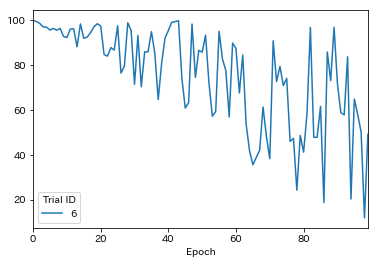

In [23]:
dummy_score.plot()

Perform another trial.

In [24]:
ex.set_parameters(a=3, b=4)
s.compute()

2019-02-09 23:13:22,780 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-09 23:13:22,782 [daskperiment.core.trial] [INFO] Started Experiment (trial id=14)
2019-02-09 23:13:22,783 [daskperiment.core.experiment] [INFO] Target: calculate_score-f407db73-6a67-4d0b-9fb7-024577dea63f
2019-02-09 23:13:22,784 [daskperiment.core.experiment] [INFO] Random seed is not provided. Initializing with generated seed: 2164296497
2019-02-09 23:13:22,785 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-09 23:13:22,786 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_14.py
2019-02-09 23:13:22,787 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_14.txt
2019-02-09 23:13:22,789 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirem

1.4285714285714286

To compare metrics between trials, pass multiple trial ids to `Experiment.load_metric`.

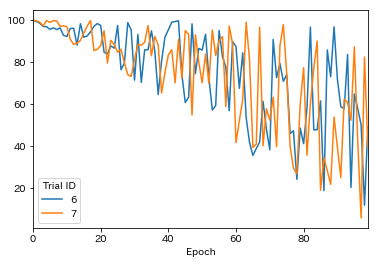

In [25]:
ex.load_metric('dummy_score', trial_id=[6, 7]).plot()

# Check code context

The above example illustrated `daskperiment` tracks code contexts decorated with `Experiment` decorators. 

To check the tracked code contexts, use `Experiment.get_code` specifying trial id (shows current code if trial id is not provided).

In [26]:
print(ex.get_code())

@ex.persist
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return 10 / s



In [27]:
print(ex.get_code(trial_id=1))

@ex
def prepare_data(a, b):
    return a + b 


@ex.result
def calculate_score(s):
    return 10 / s



Each code context is also saved as a text file per trial id. Thus, these are easily handled by diff tools and  Git.

In [28]:
%cat daskperiment_cache/quickstart_pj/code/quickstart_pj_1.py

# Code output saved in trial_id=1
@ex
def prepare_data(a, b):
    return a + b 


@ex.result
def calculate_score(s):
    return 10 / s


# Save experiment result

`daskperiment` automatically saves its internal state when the experiment result is computed (when `.compute` is called). Also, `Experiment` instance automatically recover previous state when it is instanciated.

Following example instanciates `Experiment` instance using the same id as above. Thus, the created `Experiment` automatically recovers its state. 

In [29]:
ex_new = daskperiment.Experiment(id='quickstart_pj')

2019-02-09 23:13:23,331 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/quickstart_pj
2019-02-09 23:13:23,336 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-02-09 23:13:23,339 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/quickstart_pj') from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-02-09 23:13:23,341 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: quickstart_pj, trial_id: 14, backend: LocalBackend('daskperiment_cache/quickstart_pj'))
2019-02-09 23:13:23,348 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-09 23:13:23,350 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-02-09 23:13:23,354 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.1.dev0
2019-02-09 23:13:23,355 [das

Calling `.get_history` returns information of previous trials.

In [30]:
ex_new.get_history()

,a,b,Seed,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,,
1,1,2,3621047138,3.333333,<class 'float'>,True,2019-02-09 23:12:17.823271,00:00:00.020709,NaN
2,1,3,3028304101,2.500000,<class 'float'>,True,2019-02-09 23:12:17.862060,00:00:00.019239,NaN
3,1,-1,3427595011,NaN,None,False,2019-02-09 23:12:18.120727,00:00:00.036386,ZeroDivisionError(division by zero)
4,1,2,3074590505,3.333333,<class 'float'>,True,2019-02-09 23:12:18.274840,00:00:00.019795,NaN
5,3,2,188388652,2.000000,<class 'float'>,True,2019-02-09 23:12:18.316023,00:00:00.020726,NaN
6,1,2,2062562240,3.333333,<class 'float'>,True,2019-02-09 23:12:18.440663,00:00:00.024480,NaN
7,3,4,2263352391,1.428571,<class 'float'>,True,2019-02-09 23:12:18.957242,00:00:00.024543,NaN
8,1,2,4119651207,3.333333,<class 'float'>,True,2019-02-09 23:13:21.735993,00:00:00.023776,NaN
9,1,3,2786204846,2.500000,<class 'float'>,True,2019-02-09 23:13:21.822778,00:00:00.023758,NaN


Also, `Experiment` instance automatically detects the environment change from its previous trial. Following is a sample log when package update is detected (pandas 0.23.4 -> 0.24.0).

    2019-01-29 00:22:35,357 [daskperiment.io.serialize] [INFO] Loaded Experiment(id: quickstart_pj, trial_id: 14) from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
    2019-01-29 00:22:35,404 [daskperiment.core.environment] [WARNING] Installed Python packages have been changed
    2019-01-29 00:22:35,408 [daskperiment.core.environment] [WARNING] @@ -142 +142 @@
    2019-01-29 00:22:35,411 [daskperiment.core.environment] [WARNING] -pandas 0.23.4 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)
    2019-01-29 00:22:35,412 [daskperiment.core.environment] [WARNING] +pandas 0.24.0 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)

# Run as CLI

`daskperiment` also supports execution from command line. First, prepare a `Python` script to define experiment. The usage of `Experiment` class is all the same as Jupyter example. `daskperiment` regards a result of a function decorated with `Experiment.result` (`calculate_score` function in below case) as experiment output.

In [31]:
%cat ../scripts/simple_experiment.py

import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')

a = ex.parameter('a')
b = ex.parameter('b')


@ex
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    return s + 1


d = prepare_data(a, b)
calculate_score(d)


You can provide parameter values from command line options using `key=value` format. `daskperinemt` automatically parse parameters and perform computation.

In [32]:
!python ../scripts/simple_experiment.py a=1 b=2

2019-02-09 23:13:24,233 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-02-09 23:13:24,235 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-09 23:13:24,236 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/simple_experiment_pj') from path=daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-09 23:13:24,236 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: simple_experiment_pj, trial_id: 2, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-09 23:13:24,605 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-09 23:13:24,605 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (File)
2019-02-09 23:13:24,605 [daskperiment.core.environment] [INFO] daskperiment versi

Let's perform multiple trials using different parameters. `daskperiment` automatically saves trial history as the same as Jupyter example (see trial id is incremented).

In [33]:
!python ../scripts/simple_experiment.py a=3 b=2

2019-02-09 23:13:25,578 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-02-09 23:13:25,580 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-09 23:13:25,581 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/simple_experiment_pj') from path=daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-09 23:13:25,581 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: simple_experiment_pj, trial_id: 3, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-09 23:13:25,924 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-09 23:13:25,924 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (File)
2019-02-09 23:13:25,924 [daskperiment.core.environment] [INFO] daskperiment versi

To confirm the experiment results, instanciate Experiment specifying the same id as the script and use Experiment.get_history.

In [34]:
import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')
ex.get_history()

2019-02-09 23:13:26,259 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-02-09 23:13:26,263 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-09 23:13:26,267 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/simple_experiment_pj') from path=daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-09 23:13:26,271 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: simple_experiment_pj, trial_id: 4, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-09 23:13:26,279 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-09 23:13:26,282 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-02-09 23:13:26,286 [daskperiment.core.environment] [INFO] daskpe

,a,b,Seed,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,,
1,1,2,579607806,4,<class 'int'>,True,2019-02-09 23:12:20.970940,00:00:00.005830,NaN
2,3,2,275887783,6,<class 'int'>,True,2019-02-09 23:12:22.352482,00:00:00.005989,NaN
3,1,2,1234361236,4,<class 'int'>,True,2019-02-09 23:13:24.620345,00:00:00.005838,NaN
4,3,2,1357069363,6,<class 'int'>,True,2019-02-09 23:13:25.938545,00:00:00.005306,NaN
